In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt -O fruit_data_with_colors.txt
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py -O adspy_shared_utilities.py


--2020-12-09 08:14:00--  http://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt
Resolving www.eyrignoux.com.fr (www.eyrignoux.com.fr)... 62.210.16.62
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt [following]
--2020-12-09 08:14:00--  https://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2370 (2.3K) [text/plain]
Saving to: ‘fruit_data_with_colors.txt’

fruit_data_with_col 100%[===================>]   2.31K  --.-KB/s    in 0s      

2020-12-09 08:14:01 (248 MB/s) - ‘fruit_data_with_colors.txt’ saved [2370/2370]

--2020-12-09 08:14:01--  http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utili

In [3]:

from adspy_shared_utilities import plot_fruit_knn

In [4]:
!apt update && apt install -y graphviz
!pip install graphviz

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/mai

#Normalization
**Cette technique améliore les résultats de la plupart des algorithmes.**

Ici nous l'utilisons avec le k-nearest neighbors, qui travaille sur la distance qui sépare les points, mais cela fonctionne bien également avec de nombreux autres, en particulier la régression et la régression logistique, pour aider à la descente de gradient (nous verrons cela plus loin). 

**Comme la régression logistique est à la base des réseaux de neurones, la normalisation est également efficace avec les réseaux de neurones, et donc avec le Deep Learning.** Les algorithmes de Deep Learning "state of the art" utilisent une version évoluée, baptisée "Batch normalization": https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c

**Le principe de la normalisation est de mettre les variables "à la même échelle".** 

Par exemple, dans notre jeu de données, on voit que la valeur des couleurs est bien plus petite que les autres variables, et la masse, bien plus grosse:

In [5]:

fruits = pd.read_table('fruit_data_with_colors.txt')

X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits.describe()

,height,width,mass,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,7.693220,7.105085,163.118644,0.762881
std,1.361017,0.816938,55.018832,0.076857
min,4.000000,5.800000,76.000000,0.550000
25%,7.200000,6.600000,140.000000,0.720000
50%,7.600000,7.200000,158.000000,0.750000
75%,8.200000,7.500000,177.000000,0.810000
max,10.500000,9.600000,362.000000,0.930000



De ce fait, la distance entre les points dépend très peu du "color_score" (puisque la distance entre des "color_score" différents est faible), et beaucoup de "mass" (puisque la distance entre des "mass" différentes est grande). **Si on modifie ces échelles pour toutes les ramener à un intervalle similaire, les variables se mettent à avoir toutes la même importance et l'algorithme fonctionne mieux. **

Dans les exemples ci-dessous, nous utilisons le MinMaxScaler: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
Le MinMaxScaler est très simple: il ramène toutes les variables à un intervalle compris entre 0 et 1. Autrement dit:
- les prix sont ramenés à un intervalle compris entre 0 et 1
- idem pour le nombre de pièces
- idem pour les éventuelles autres features

Il y a d'autres façons de s'y prendre: http://scikit-learn.org/stable/modules/preprocessing.html

On pourra donc tester plusieurs types de normalisation, et garder celle qui donne les meilleurs résultats.

##Amélioration des résultats
Pour rappel, dans le cours 1.2 sur l'algorithme k-nrearest neighbors, nous avons obtenu un accuracy de 0.533333333333333 sur le training set des fruits, en gardant les features suivantes: 'mass', 'width', 'height'.

Ici, nous améliorons sensiblement les résultats:
- en gardant les 4 features (ie. nous rajoutons le 'color-score')
- et en utilisant la normalisation



In [6]:


X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn2.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


In [7]:
X_train_plot = X_train[['height', 'width', 'mass', 'color_score']]
X_train_plot['height'] = X_train_scaled[:,0]
X_train_plot['width'] = X_train_scaled[:,1]
X_train_plot['mass'] = X_train_scaled[:,2]
X_train_plot['color_score'] = X_train_scaled[:,3]
plot_fruit_knn(X_train_plot, y_train, 1, 'uniform')


AttributeError: ignored

##Impact de la normalization
Pour mesurer ce qui a le plus d'impact sur l'amélioration des résultats, nous pouvons:
- utiliser la normalization sur 3 features, et pas sur 4
- utiliser 4 features, mais pas la normalization

###3 features, sans normalization

In [ ]:
X_train_3d = X_train[['height', 'width', 'mass']]
X_test_3d = X_test[['height', 'width', 'mass']]

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train_3d, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(X_train_3d, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(X_test_3d, y_test)))


Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53


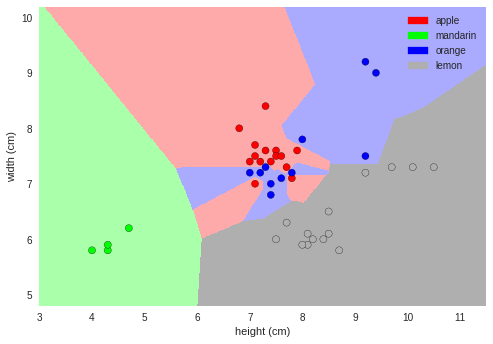

In [ ]:

plot_fruit_knn(X_train, y_train, 1, 'uniform')

###3 features, avec normalization

In [ ]:
X_train_3d = X_train[['height', 'width', 'mass']]
X_test_3d = X_test[['height', 'width', 'mass']]


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_3d_scaled = scaler.fit_transform(X_train_3d)
# we must apply the scaling to the test set that we computed for the training set
X_test_3d_scaled = scaler.transform(X_test_3d)


knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train_3d_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(X_train_3d_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(X_test_3d_scaled, y_test)))


Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.60


###4 features, sans normalization

In [ ]:

knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53
